<a href="https://colab.research.google.com/github/OksanaBut77/TFM/blob/main/TFM_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime
import seaborn as sns

In [34]:
df_member = pd.read_excel('/content/drive/MyDrive/TFM/Data set of Member Info.xlsx')
print(df_member.head(5))

   id  card_id  member_date  password        phone sex    birthday  point  \
0   1  1936560          NaN    123456  136opaq7233   男  1968-12-01    0.0   
1   2  3208730          NaN    123456  135omrc0269   男  1954-07-24    0.0   
2   3  4053650          NaN    123456  157ebob6164   女  2016-09-02    0.0   
3   4  4053950          NaN    123456  159rmrp8106   女  1951-09-13    0.0   
4   5  4133810          NaN    123456  139oeqn2724   男  2015-12-28    0.0   

                  sfz address  ... county_code  street_code fate21 fate22  \
0  510224fardcdpq4379     NaN  ...         NaN          NaN    NaN    NaN   
1                 NaN     NaN  ...         NaN          NaN    NaN    NaN   
2                 NaN     NaN  ...         NaN          NaN    NaN    NaN   
3  510223oarqqroh1425     NaN  ...         NaN          NaN    NaN    NaN   
4                 NaN     NaN  ...         NaN          NaN    NaN    NaN   

  fate23  fate24  fate25 value_level active_level nick_name  
0    NaN    

In [35]:
df_member.shape

(10000, 123)

NaNs

In [36]:
pd.set_option('display.max_rows', None)
nan_percent = (df_member.isna().mean() * 100).sort_values(ascending=False)
print(nan_percent)

member_date               100.00
apply_card_date           100.00
member_gms                100.00
delete_user_id            100.00
status_code               100.00
card_depart_id            100.00
last_consume_dp_id        100.00
disease                   100.00
longitude                 100.00
city_name                 100.00
parent_card_id            100.00
fate2                     100.00
fate3                     100.00
fate4                     100.00
fate5                     100.00
fate6                     100.00
fate7                     100.00
fate8                     100.00
fate9                     100.00
fate10                    100.00
province_name             100.00
fate19                    100.00
fate20                    100.00
street_code               100.00
county_code               100.00
fate22                    100.00
fate21                    100.00
head_pic                  100.00
last_sale_man             100.00
corp_tag                  100.00
last_workw

In [37]:
translation1 = {
    "会员卡": 0,
    "和平药房银卡": 1,
    "和平药房铜卡": 2,
    "和平药房金卡": 3,
    "和平内部员工卡": 4,
    "和平药房钻石卡": 5,
    "和平药房集团VIP卡": 6,
    "和平团体会员卡": 7,

}

df_member["card_type"] = df_member["card_type"].replace(translation1)
print(df_member["card_type"].unique())


[ 0.  1.  2. nan  3.  4.  5.  6.  7.]


<ipython-input-37-f8ee10e24fd2>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_member["card_type"] = df_member["card_type"].replace(translation1)


In [38]:
translation2 = {
        '女': 1,
        '男': 0,
        '无': None
}

df_member["sex"] = df_member["sex"].replace(translation2)
print(df_member["sex"].unique())

[ 0.  1. nan]


<ipython-input-38-c548cf04bed1>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_member["sex"] = df_member["sex"].replace(translation2)


In [39]:
date_columns = ["birthday", "last_consume_time", "updatetime"]

# formato datetime
for col in date_columns:
   df_member[col] = pd.to_datetime(df_member[col], errors="coerce")

In [40]:
for col in date_columns:
    min_date = df_member[col].min()
    max_date = df_member[col].max()
    print(f"{col}:")
    print(f"Oldest date: {min_date}")
    print(f"The most recent date: {max_date}\n")

birthday:
Oldest date: 1798-09-13 00:00:00
The most recent date: 2021-07-09 00:00:00

last_consume_time:
Oldest date: 2016-01-01 12:41:11
The most recent date: 2021-12-12 21:53:18

updatetime:
Oldest date: 2021-09-13 05:16:06
The most recent date: 2021-12-14 07:27:12



In [41]:
# duplicados
duplicados = df_member[df_member.duplicated()]
print(duplicados)

Empty DataFrame
Columns: [id, card_id, member_date, password, phone, sex, birthday, point, sfz, address, card_type, depart_id, createdate, last_time, member_class, member_gms, pharmacist_id, jiance_flag, yongyao_flag, daoqi_flag, isEffective, stat, tel, shop_id, apply_card_date, state, define_class, is_sms, level, is_ncd, is_check, updatetime, ncd_update_time, level_monlog, last_visit_time, assign, delete_user_id, consume_level, amount, disease, card_depart_id, status_code, last_consume_time, last_consume_dp_id, consume_times, is_get_card, last_sendsms_time, maintain_task_ids, t1, t2, t3, t4, t5, sum_enddate, t6, t7, a1, a2, a3, a4, a5, a6, a7, open_id, invalid_type, balance, has_filed, filing_time, file_update_time, medication_record_type, gukeid, account_modifytime, jifen_modifytime, operator, fate1, fate2, fate3, fate4, fate5, fate6, fate7, fate8, fate9, fate10, is_suff, user_card_code, province_name, city_name, district_name, parent_card_id, child_num, head_pic, last_sale_man, user

Feature selection

In [42]:
df_member_cut = df_member[["depart_id", "card_id", "member_class", "last_consume_time", "card_type", "define_class",
                           "is_suff", "level", "birthday", "consume_level", "point",
                           "updatetime", "sex"]]

In [43]:
df_member_cut.columns

Index(['depart_id', 'card_id', 'member_class', 'last_consume_time',
       'card_type', 'define_class', 'is_suff', 'level', 'birthday',
       'consume_level', 'point', 'updatetime', 'sex'],
      dtype='object')

In [44]:
df_member_cut.shape

(10000, 13)

In [45]:
print(df_member_cut.head(5))

   depart_id  card_id                                       member_class  \
0     270297  1936560                                                NaN   
1     270297  3208730                         ,null,fsl,pfwyl,xdl,qrjdl,   
2     270155  4053650  ,null,zbl,gdl,jsl2,kssl,ykl,etl,rhl,qrjdl,wkl,...   
3     270155  4053950  ,null,wkbjl,gml,rhl,etl,gxyl,kql,xzbl,zkl,sjxt...   
4     270297  4133810                                                NaN   

    last_consume_time  card_type  \
0                 NaT        0.0   
1 2020-01-22 09:18:15        0.0   
2 2021-11-13 09:57:18        0.0   
3 2021-12-05 18:49:25        0.0   
4                 NaT        0.0   

                                   define_class  is_suff  level   birthday  \
0                                ,jz88stkhy294,        0      2 1968-12-01   
1                   ,jz88stkhy294,yqdhyx216639,        0      2 1954-07-24   
2                                ,yqdhyx216639,        0      3 2016-09-02   
3  ,jz88stkhy2

In [46]:
# AGE
df_member_cut['updatetime'] = pd.to_datetime(df_member_cut['updatetime'])
df_member_cut['birthday'] = pd.to_datetime(df_member_cut['birthday'])

#  máx de updatetime
max_updatetime = df_member_cut['updatetime'].max()

# edad como la diferencia entre max_updatetime y birthday
df_member_cut['age'] = (max_updatetime - df_member_cut['birthday']).dt.days // 365

<ipython-input-46-2283e446b5e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member_cut['updatetime'] = pd.to_datetime(df_member_cut['updatetime'])
<ipython-input-46-2283e446b5e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member_cut['birthday'] = pd.to_datetime(df_member_cut['birthday'])
<ipython-input-46-2283e446b5e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [47]:
df_member_cut["age"].describe()

,age
count,9994.000000
mean,34.187913
std,21.100725
min,0.000000
25%,24.000000
50%,24.000000
75%,46.000000
max,223.000000


In [48]:
# Recency
df_member_cut['updatetime'] = pd.to_datetime(df_member_cut['updatetime'], errors='coerce')
df_member_cut['last_consume_time'] = pd.to_datetime(df_member_cut['last_consume_time'], errors='coerce')

# Calcular la diferencia en días para cada registro
df_member_cut['Recency'] = (df_member_cut['updatetime'] - df_member_cut['last_consume_time']).dt.days
# max	2173
df_member_cut.loc[df_member_cut['Recency'] > 1460, 'Recency'] = 1450

<ipython-input-48-d76016e9caef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member_cut['updatetime'] = pd.to_datetime(df_member_cut['updatetime'], errors='coerce')
<ipython-input-48-d76016e9caef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member_cut['last_consume_time'] = pd.to_datetime(df_member_cut['last_consume_time'], errors='coerce')
<ipython-input-48-d76016e9caef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [49]:
df_member_cut["Recency"].describe()

,Recency
count,4214.000000
mean,652.970574
std,613.717341
min,1.000000
25%,53.000000
50%,372.000000
75%,1450.000000
max,1459.000000


In [50]:
from sklearn.preprocessing import LabelEncoder

# diccionario para guardar los encoders y revertir transformaciones si es necesario
label_encoders = {}

# Columnas categóricas
categorical_cols = ["member_class", "define_class", "card_type"]

for col in categorical_cols:
    le = LabelEncoder()
    df_member_cut[col] = le.fit_transform(df_member_cut[col].astype(str))  # Convertir a string antes de codificar
    label_encoders[col] = le  # Guardar el encoder por si necesitamos revertir

<ipython-input-50-45afd25bb898>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member_cut[col] = le.fit_transform(df_member_cut[col].astype(str))  # Convertir a string antes de codificar
<ipython-input-50-45afd25bb898>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_member_cut[col] = le.fit_transform(df_member_cut[col].astype(str))  # Convertir a string antes de codificar
<ipython-input-50-45afd25bb898>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

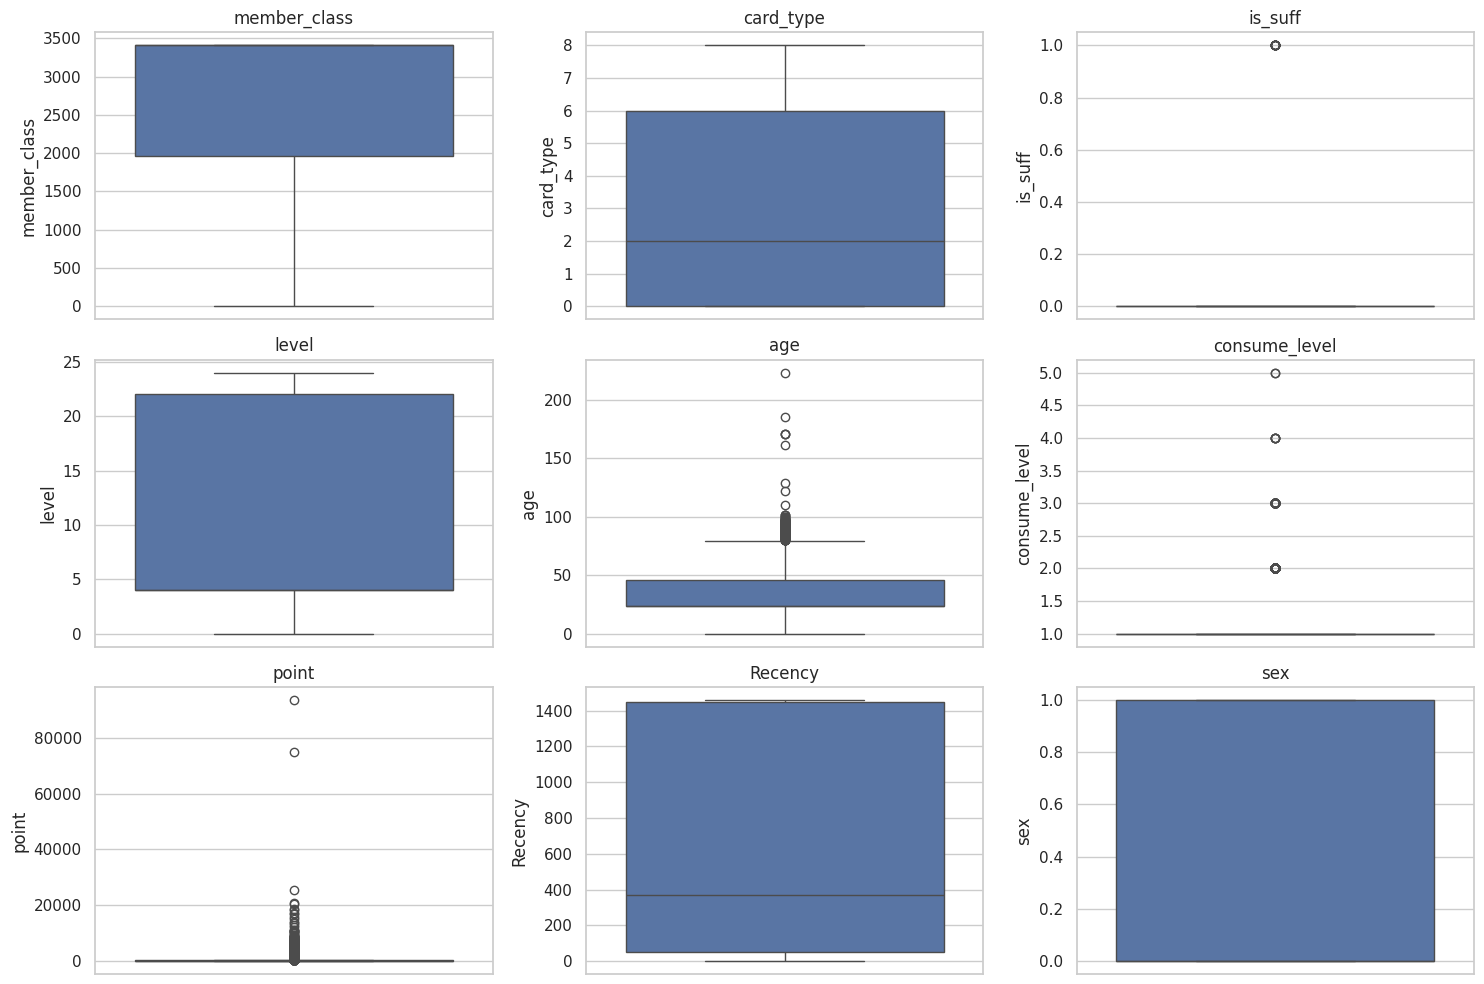

In [51]:
# Seleccionar columnas
numeric_cols = ["member_class", "card_type", "is_suff", "level", "age", "consume_level", "point", "Recency", "sex"]

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_member_cut[col])
    plt.title(col)

plt.tight_layout()
plt.show()

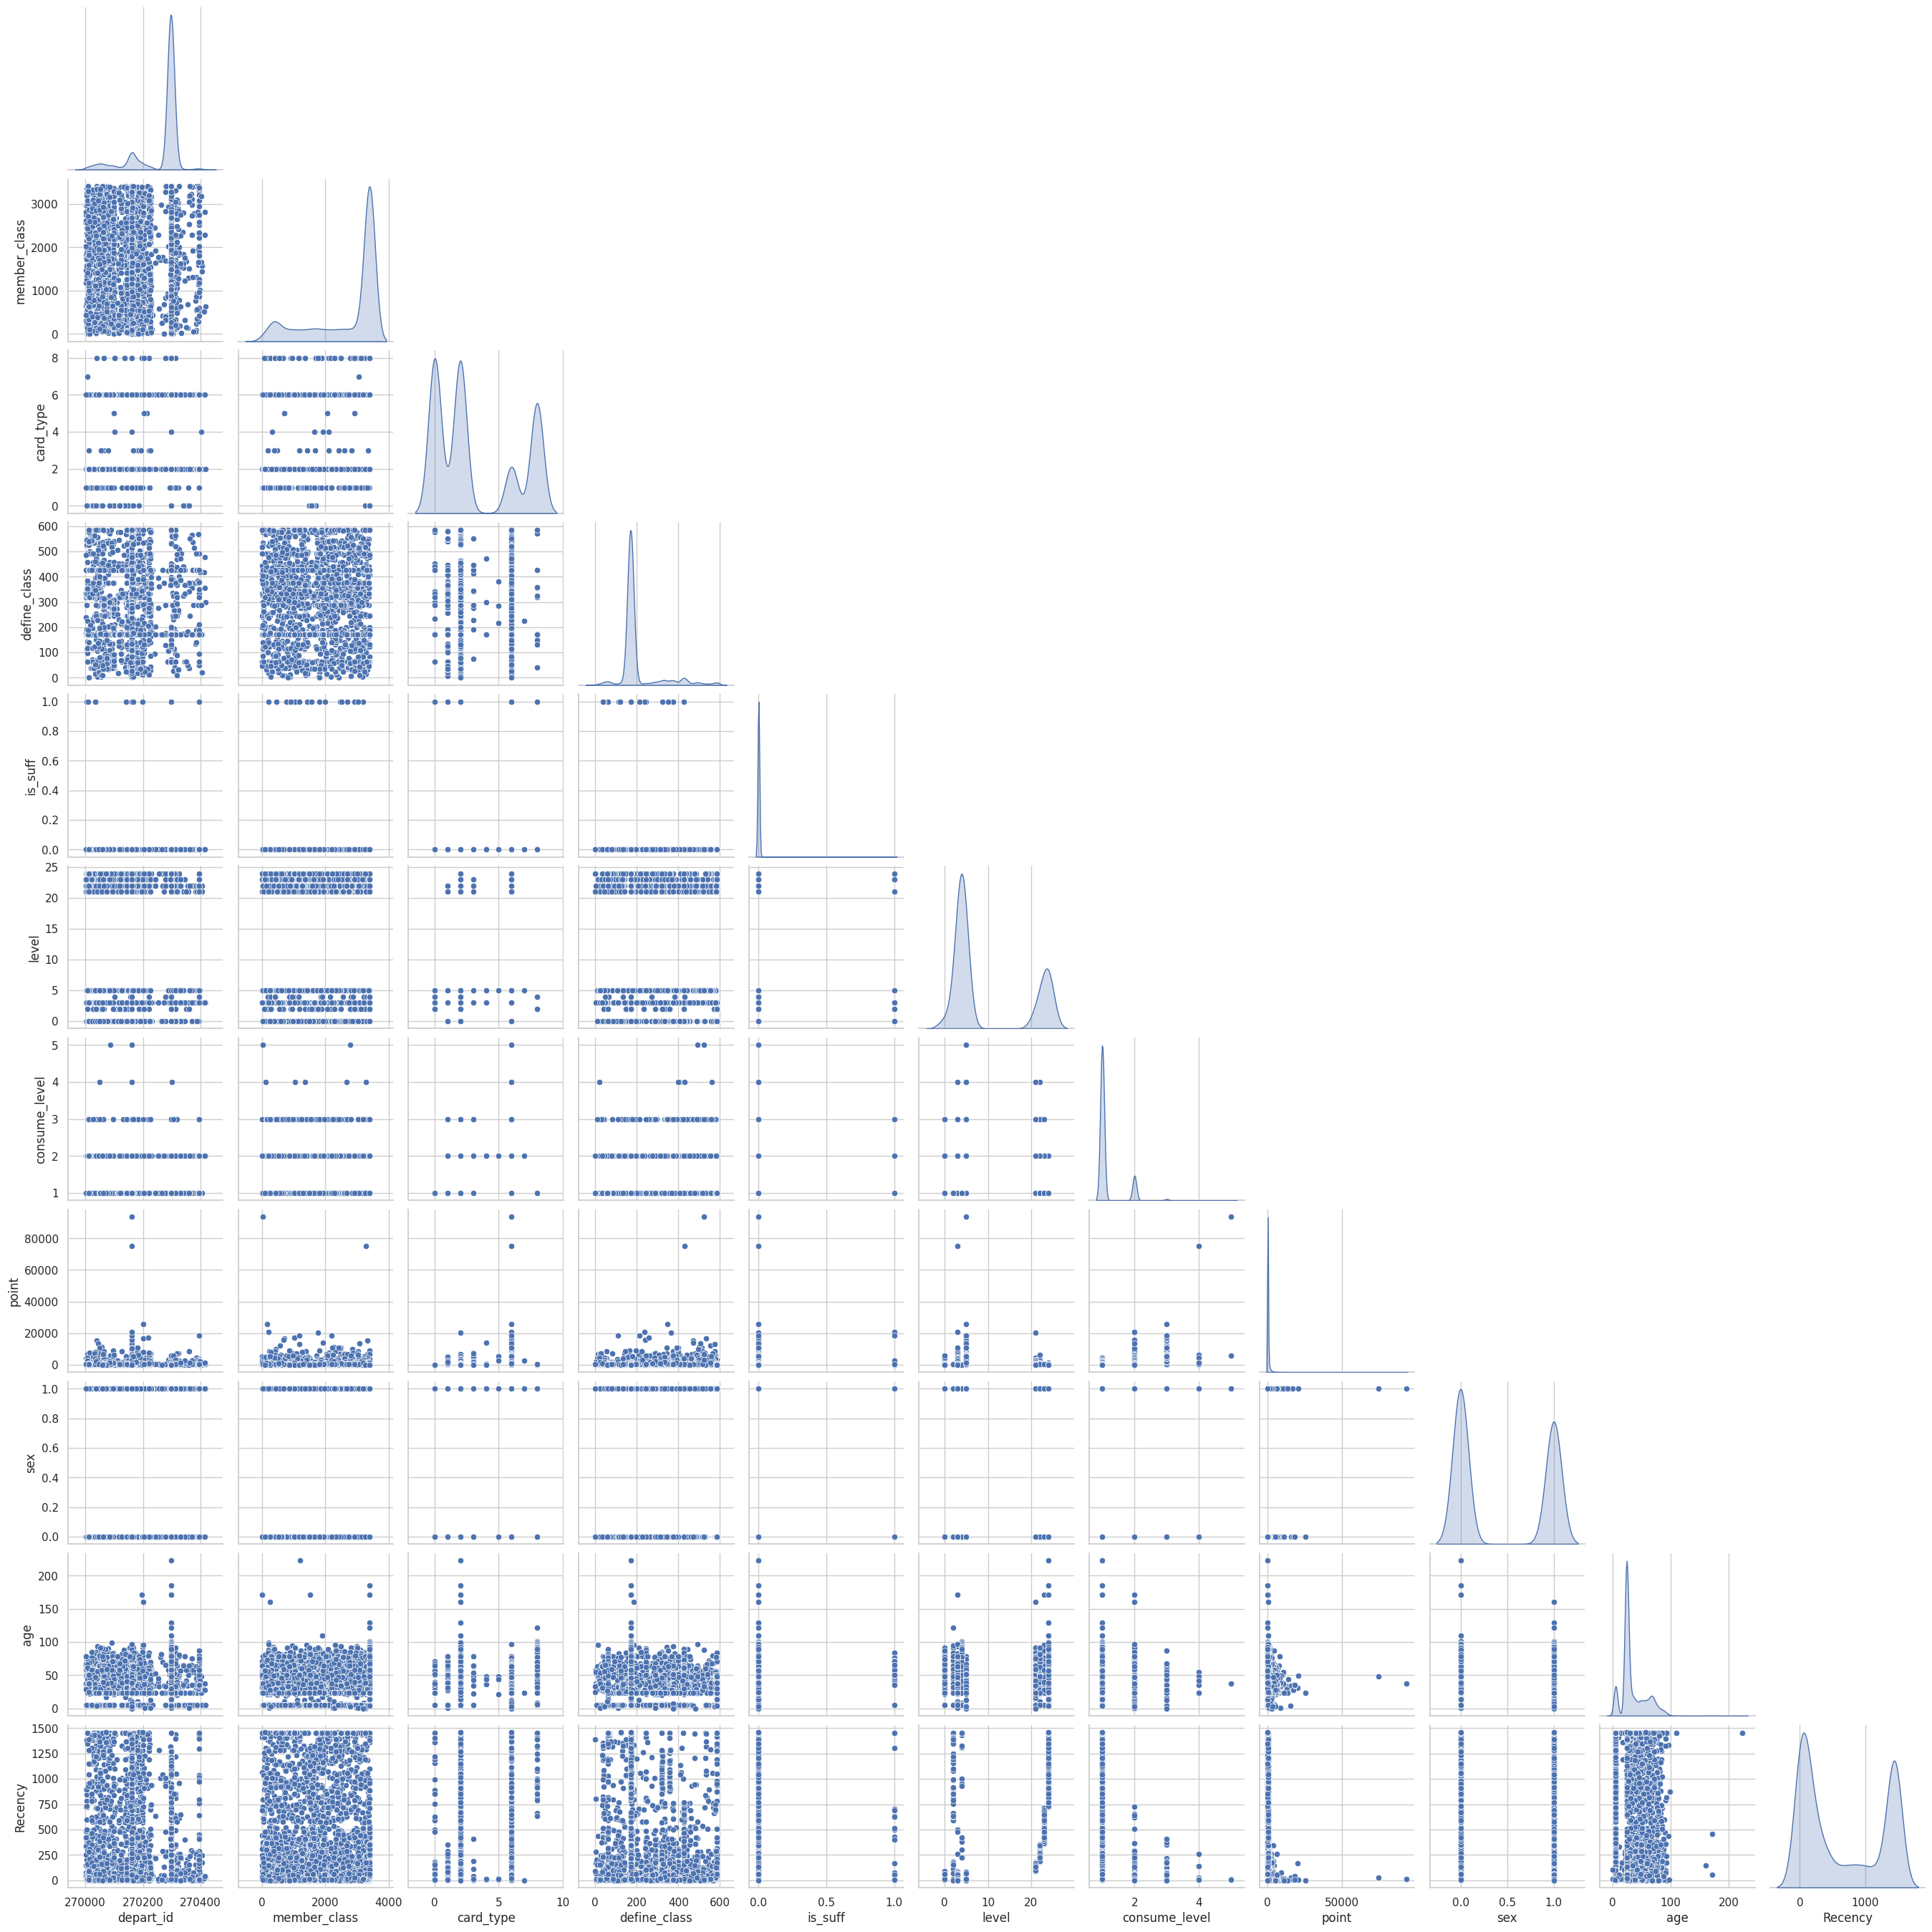

In [52]:
sns.set(style="whitegrid")

# Pairplot de las variables numéricas
sns.pairplot(df_member_cut, diag_kind="kde", corner=True)
plt.show()

In [53]:
df_member_cut.shape

(10000, 15)

In [55]:
df_member_cut.to_csv('/content/drive/MyDrive/TFM/df_member_base.csv', index=False)

from google.colab import files
files.download('/content/drive/MyDrive/TFM/df_member_base.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>